<a href="https://colab.research.google.com/github/DharmendraYadav96/Car-Dekho-Linear-Regression-Project/blob/main/Car_Dekho_Linear_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Car Dekho Linear Regression Project**

### <b>Objective</b>

In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

- name
- year
- selling_price
- km_driven
- fuel
- seller_type
- transmission
- Owner

## **Explore the Data**

In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date

In [138]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
path_1 = '/content/drive/MyDrive/Dataset/CAR DETAILS FROM CAR DEKHO.csv'
df = pd.read_csv(path_1)

In [140]:
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


There are total 8 variable.
- object - 6
- int - 2

Object datatype needs to be converted to numerical data type.

**name**: extract company and then use one hot encoding

**year**: find out the age of vehicle

**fuel, seller_type, transmission** : one hot encoding

**owner**: cardinal encoding

In [142]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


**Creating list of categorical feature and numerical feature**

In [143]:
numerical_feature = ['year', 'selling_price', 'km_driven']
categorical_feature = df.drop(labels = numerical_feature, axis =1).columns.tolist()
print(numerical_feature)
print(categorical_feature)

['year', 'selling_price', 'km_driven']
['name', 'fuel', 'seller_type', 'transmission', 'owner']


**Unique values**

In [144]:
# unique value and there count for each feature
for i in df.drop(labels = ['selling_price', 'km_driven'], axis = 1).columns:
  print(i, ":" ,df[i].nunique())
  print(df[i].unique())
  print("-"*70, '\n')


name : 1491
['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
---------------------------------------------------------------------- 

year : 27
[2007 2012 2017 2014 2016 2015 2018 2019 2013 2011 2010 2009 2006 1996
 2005 2008 2004 1998 2003 2002 2020 2000 1999 2001 1995 1997 1992]
---------------------------------------------------------------------- 

fuel : 5
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
---------------------------------------------------------------------- 

seller_type : 3
['Individual' 'Dealer' 'Trustmark Dealer']
---------------------------------------------------------------------- 

transmission : 2
['Manual' 'Automatic']
---------------------------------------------------------------------- 

owner : 5
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
----------------------------------------------

**Missing values**

In [145]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

**Good news**, no missing value

## **Data wrangling**

**1. Extract company name from name column**

In [146]:
# lthis function will separte the company name from the name column
def extract_company(x):
    name = x.split()[0]
    return name

In [147]:
df['company_name'] = df['name'].apply(extract_company) #

In [148]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company_name
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai


In [149]:
print(df['company_name'].nunique())
print(df['company_name'].unique())

29
['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Toyota' 'Jaguar'
 'Mercedes-Benz' 'Audi' 'Skoda' 'Jeep' 'BMW' 'Mahindra' 'Ford' 'Nissan'
 'Renault' 'Fiat' 'Volkswagen' 'Volvo' 'Mitsubishi' 'Land' 'Daewoo' 'MG'
 'Force' 'Isuzu' 'OpelCorsa' 'Ambassador' 'Kia']


Now, we need to figure out how to convert this categorical column to numerical column. This is discussed in feature engineering section.

**2. Calculate age of the car**

In [150]:
df['year'] = pd.to_datetime(df['year'], format='%Y')
df['year'] = df['year'].dt.year

In [151]:
current_year = datetime.now().year
df['car_age'] = current_year - df['year']

**3. Drop the unnecessary column**

In [152]:
df.drop(labels = ['name', 'year'], axis =1, inplace = True)

In [153]:
numerical_feature = ['car_age', 'selling_price', 'km_driven']
categorical_feature = df.drop(labels = numerical_feature, axis =1).columns.tolist()
print(numerical_feature)
print(categorical_feature)

['car_age', 'selling_price', 'km_driven']
['fuel', 'seller_type', 'transmission', 'owner', 'company_name']


In [154]:
df

,selling_price,km_driven,fuel,seller_type,transmission,owner,company_name,car_age
0,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,16
1,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,16
2,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,11
3,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,6
4,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,9
...,...,...,...,...,...,...,...,...
4335,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,9
4336,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,9
4337,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti,14
4338,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai,7


## **EDA**

#### **Box Plot of categorical feature**

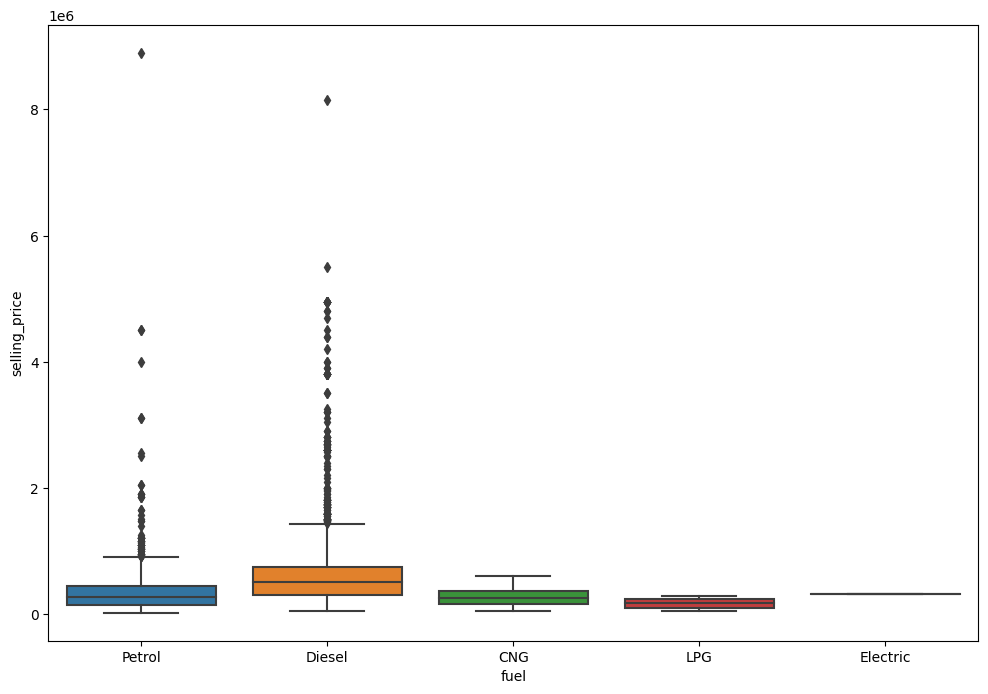

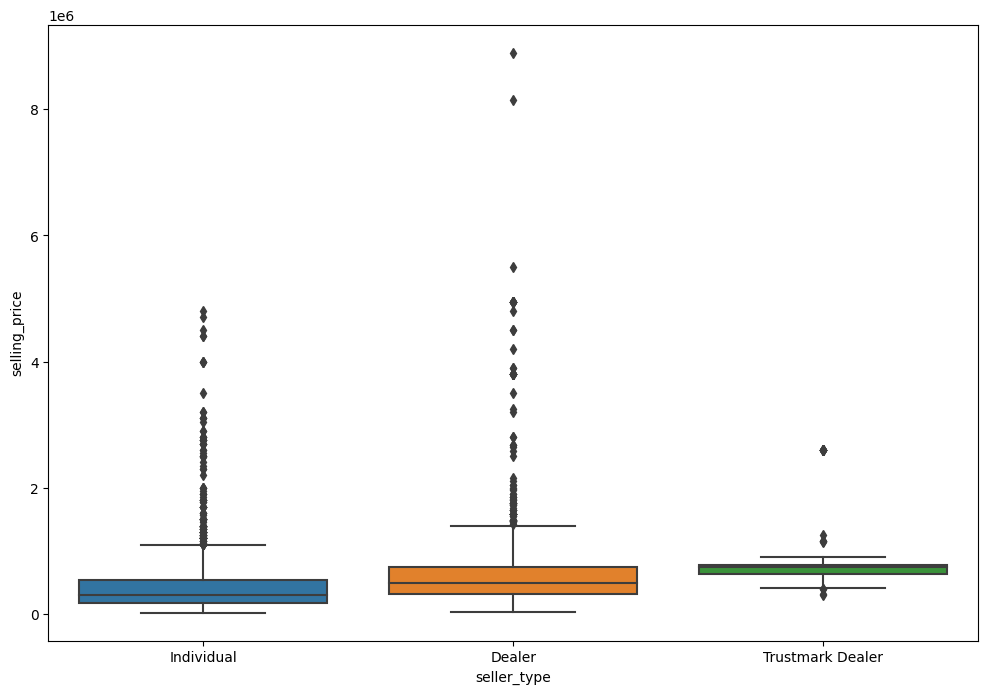

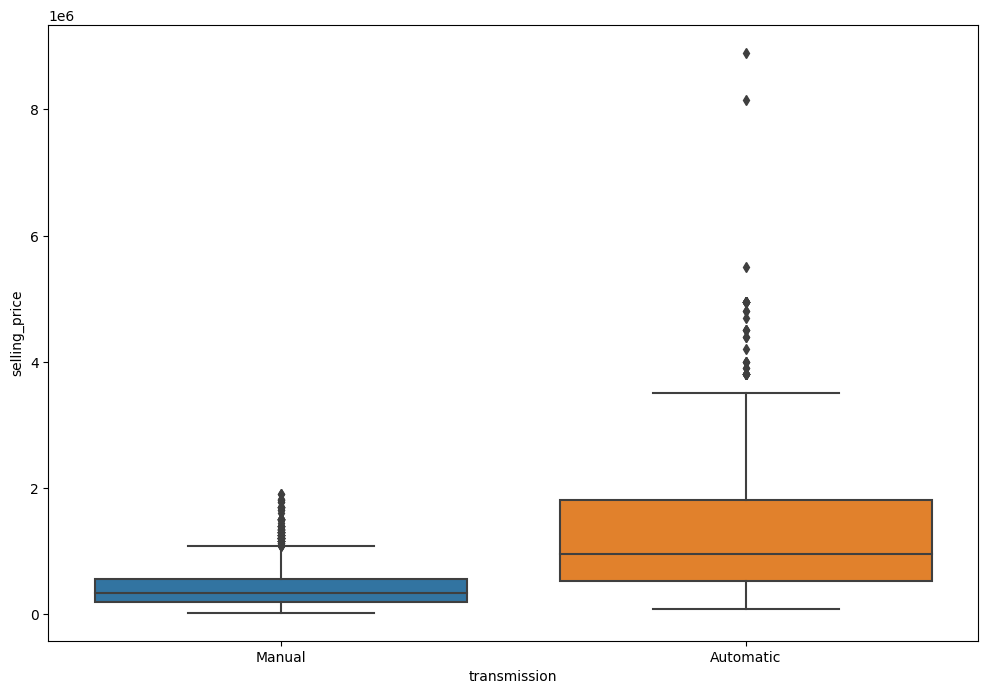

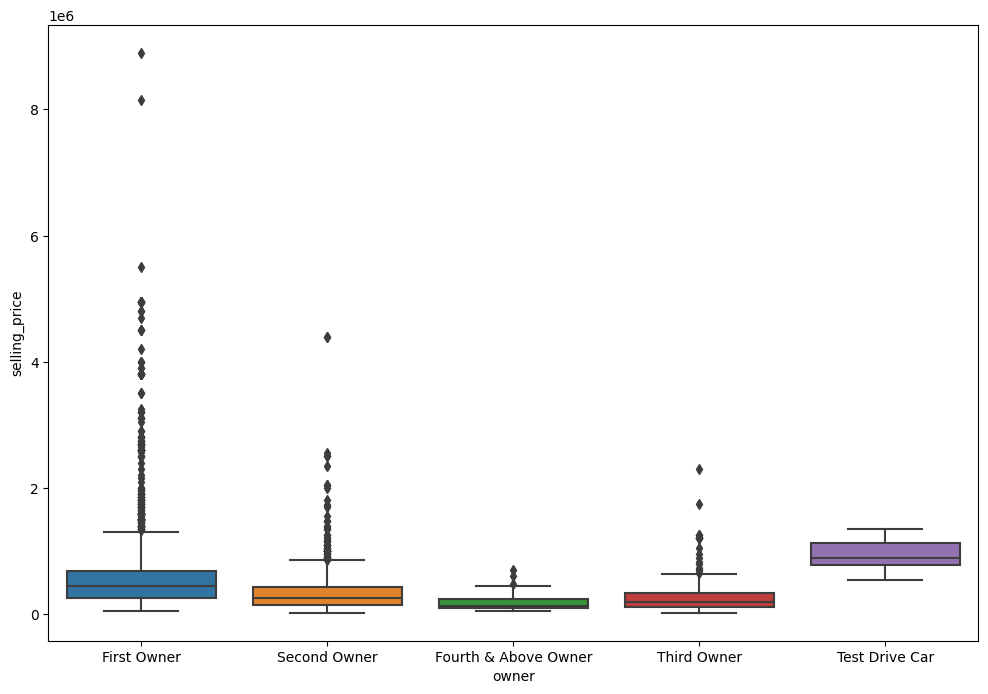

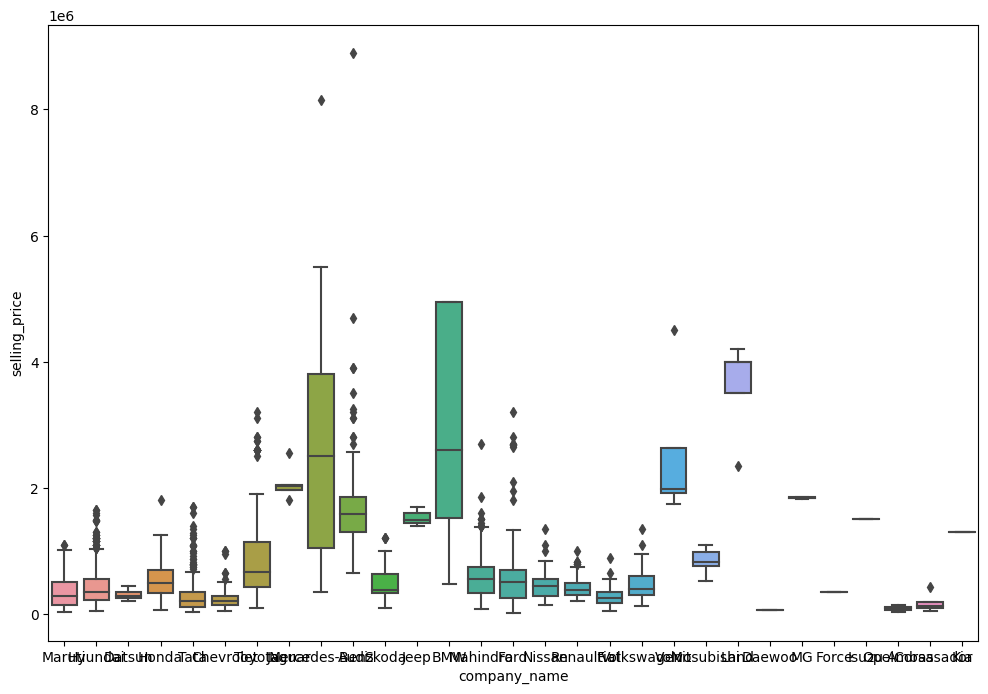

In [155]:
for i in categorical_feature:
    plt.figure(figsize = (12,8))
    sns.boxplot(x = df[i], y = df['selling_price'])
    plt.show()

#### **Box plot of numerical features**

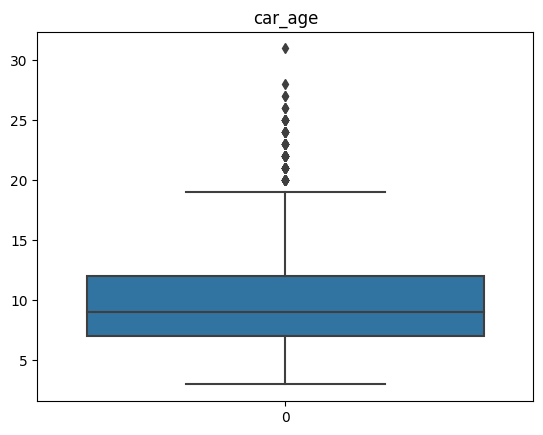

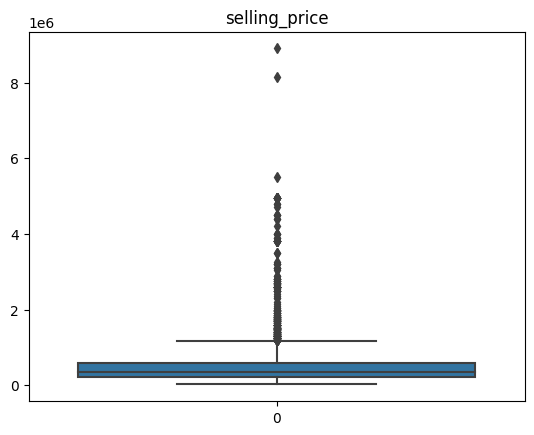

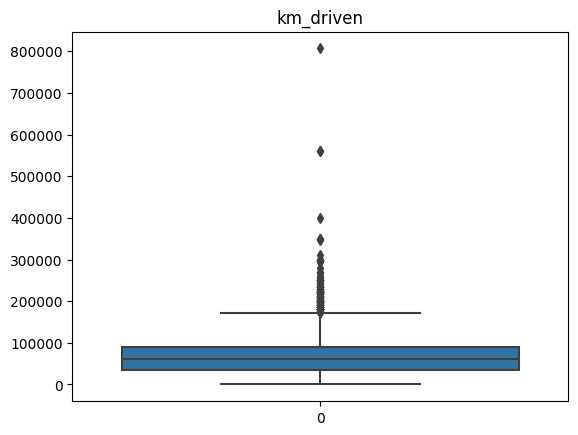

In [156]:
for feat in numerical_feature:
  sns.boxplot(df[feat])
  plt.title(feat)
  plt.show()

All the three has outliers

#### **HeatMap- correlation matrix**
Lets check the correlation between differen variables

<ipython-input-157-40b13576e1db>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

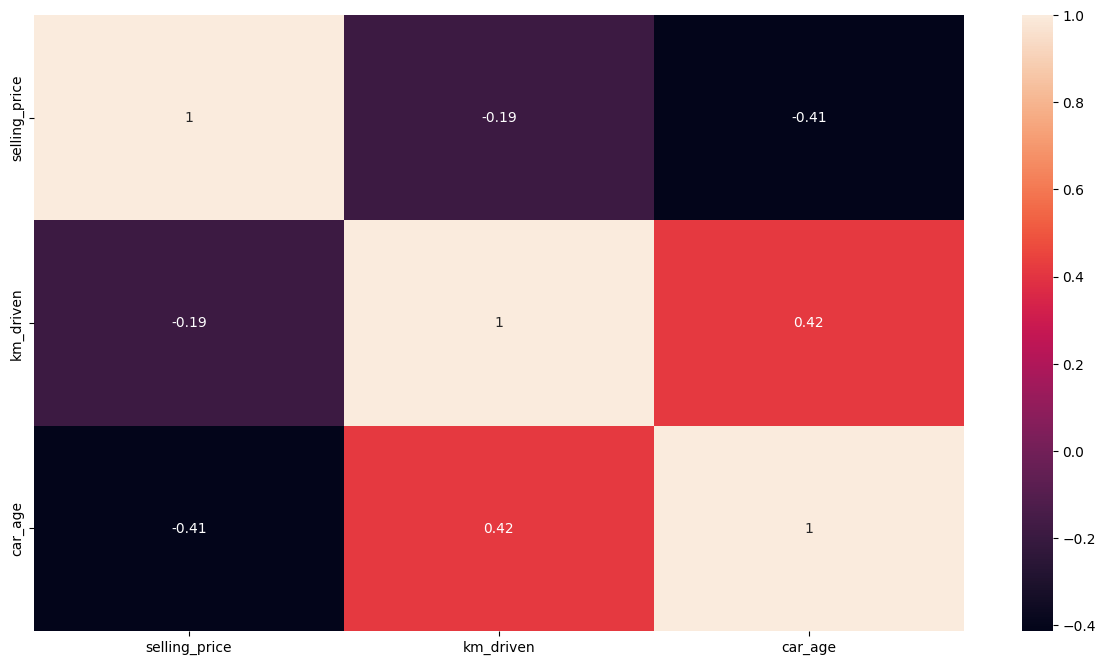

In [157]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True)

In [158]:
df.columns

Index(['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'company_name', 'car_age'],
      dtype='object')

#### **Skewness**

Lets check the skewness of variables

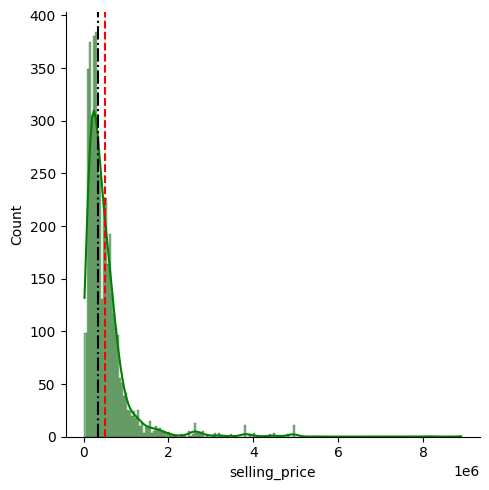

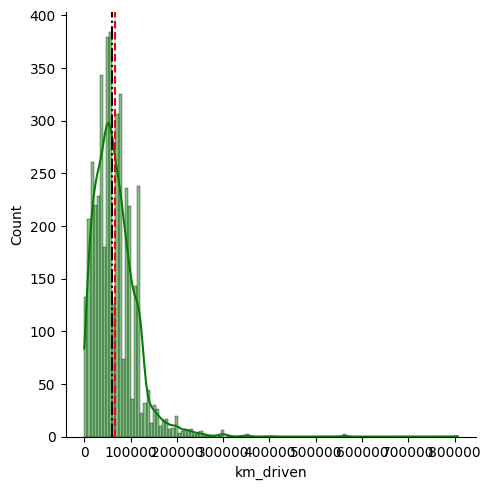

In [159]:
# feat = ['km_driven', 'selling_price', 'year']

for i in ['selling_price', 'km_driven']:
    # sns.kdeplot(df[i])

    sns.displot(df[i], color='green', kde= True)
    plt.axvline(df[i].mean(), c ='red', ls = '--')
    plt.axvline(df[i].median(), c ='black', ls = '-.')
    plt.show()


From the above plots, it can clearly observed that both the variables are imbalance.
1. For selling price, lets do the log transformation to make it normally distributed.
2. For km_driven, as discussed earlier we will drop the outliers.

Lets plot the transformed selling_price and check its skewness.

Text(0.5, 9.444444444444438, 'Selling Price')

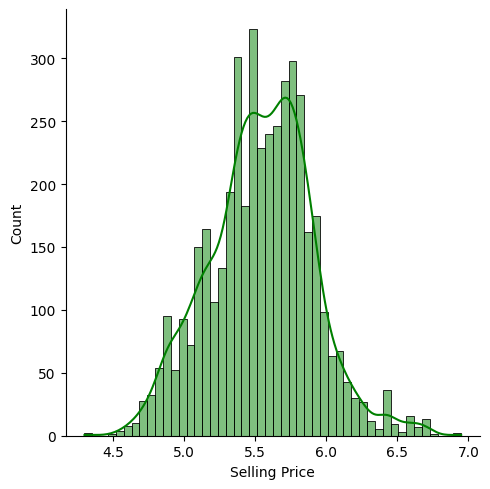

In [160]:
# plt.figure(figsize=(10,10))
sns.displot(np.log10(df['selling_price']),color='g', kde = True)
plt.xlabel('Selling Price')

This plot more noramlly distributed than others. So, we will use the transformed selling_price for training the data.

#### **Linear relationship**

In [161]:
# LETS FIND OUT THE Linear relationship between the selling price and other


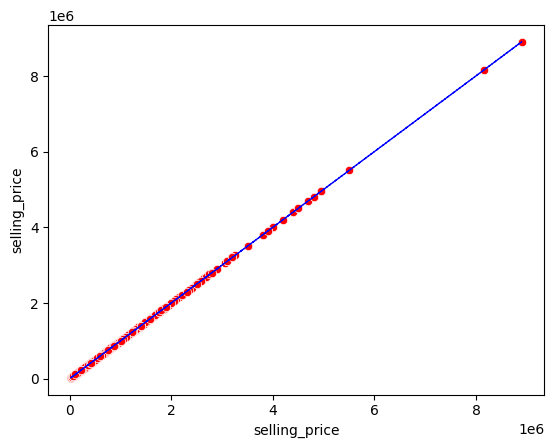

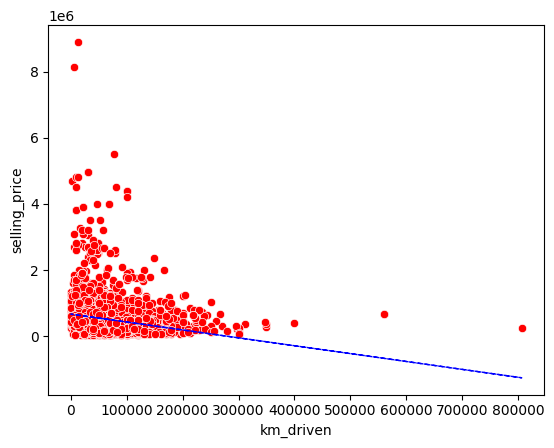

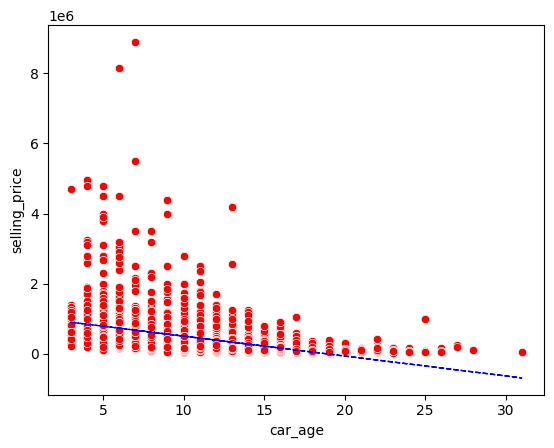

In [162]:
for i in ['selling_price', 'km_driven', 'car_age']:
    sns.scatterplot(x = df[i], y = df['selling_price'], c ='red')
    z = np.polyfit(df[i], df['selling_price'], 1)
    y_hat = np.poly1d(z)(df[i])
    plt.plot(df[i], y_hat, "b--", lw=1)
    plt.show()


#### **Check multicolinearity**

In [163]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   return(vif)

In [164]:
calc_vif(df[[i for i in df.describe().columns if i not in ['year','selling_price']]])

,variables,VIF
0,km_driven,3.537107
1,car_age,3.537107


The VIF is less than 5. So, we are good to go.

## **Feature engineering**

#### **1. Handling cateogrical data**

**1.1 Cardinal encoding**

In [165]:
owner_encoding = {'First Owner' : 1, 'Second Owner' : 2, 'Fourth & Above Owner' :4, 'Third Owner' :3, 'Test Drive Car' :0}
df['owner'] = df['owner'].map(owner_encoding)

**1.2 One hot encoding**

In [166]:
encoded_df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission'])
df = encoded_df.copy()

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   selling_price                 4340 non-null   int64 
 1   km_driven                     4340 non-null   int64 
 2   owner                         4340 non-null   int64 
 3   company_name                  4340 non-null   object
 4   car_age                       4340 non-null   int64 
 5   fuel_CNG                      4340 non-null   uint8 
 6   fuel_Diesel                   4340 non-null   uint8 
 7   fuel_Electric                 4340 non-null   uint8 
 8   fuel_LPG                      4340 non-null   uint8 
 9   fuel_Petrol                   4340 non-null   uint8 
 10  seller_type_Dealer            4340 non-null   uint8 
 11  seller_type_Individual        4340 non-null   uint8 
 12  seller_type_Trustmark Dealer  4340 non-null   uint8 
 13  transmission_Autom

In [168]:
df['selling_price'].mean()

504127.3117511521

**1.3 Company name would be replaced by the mean of selling price**

Based on domain knowledge, we understand that the brand name plays a significant role in the buying and selling of cars. Certain companies, such as BMW and Mercedes, are known for producing high-end and costly cars. Therefore, the brand name is a crucial feature in our analysis. To make this feature more relevant, we will create a ranking for each company based on the mean selling price of their cars.

In [169]:
df['company_name'].value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: company_name, dtype: int64

In [170]:
com_grouped_mean = df.groupby(['company_name'])['selling_price'].mean()
df['comapany_name_mean_encoding'] = df['company_name'].map(com_grouped_mean)
com_grouped_mean.sort_values(ascending = False)

company_name
Land             3.609800e+06
BMW              2.945385e+06
Mercedes-Benz    2.776657e+06
Volvo            2.556250e+06
Jaguar           2.069166e+06
Audi             1.931633e+06
MG               1.842500e+06
Jeep             1.530000e+06
Isuzu            1.500000e+06
Kia              1.300000e+06
Toyota           9.243592e+05
Mitsubishi       8.400000e+05
Mahindra         5.877095e+05
Ford             5.712731e+05
Honda            5.381468e+05
Skoda            4.900147e+05
Volkswagen       4.710373e+05
Nissan           4.499375e+05
Hyundai          4.199403e+05
Renault          4.193767e+05
Force            3.460000e+05
Maruti           3.424163e+05
Datsun           2.970269e+05
Tata             2.840834e+05
Fiat             2.834324e+05
Chevrolet        2.367271e+05
Ambassador       1.800000e+05
OpelCorsa        8.850000e+04
Daewoo           6.000000e+04
Name: selling_price, dtype: float64

In [171]:
df.head(5)

,selling_price,km_driven,owner,company_name,car_age,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,comapany_name_mean_encoding
0,60000,70000,1,Maruti,16,0,0,0,0,1,0,1,0,0,1,342416.295312
1,135000,50000,1,Maruti,16,0,0,0,0,1,0,1,0,0,1,342416.295312
2,600000,100000,1,Hyundai,11,0,1,0,0,0,0,1,0,0,1,419940.260658
3,250000,46000,1,Datsun,6,0,0,0,0,1,0,1,0,0,1,297026.945946
4,450000,141000,2,Honda,9,0,1,0,0,0,0,1,0,0,1,538146.781746


In [172]:
df['company_rank'] = df['comapany_name_mean_encoding'].rank()

In [173]:
df.head(5)

,selling_price,km_driven,owner,company_name,car_age,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,comapany_name_mean_encoding,company_rank
0,60000,70000,1,Maruti,16,0,0,0,0,1,0,1,0,0,1,342416.295312,1270.5
1,135000,50000,1,Maruti,16,0,0,0,0,1,0,1,0,0,1,342416.295312,1270.5
2,600000,100000,1,Hyundai,11,0,1,0,0,0,0,1,0,0,1,419940.260658,2468.0
3,250000,46000,1,Datsun,6,0,0,0,0,1,0,1,0,0,1,297026.945946,612.0
4,450000,141000,2,Honda,9,0,1,0,0,0,0,1,0,0,1,538146.781746,3243.5


In [174]:
check_values = df.groupby('company_name')['company_rank'].mean()
check_values.sort_values(ascending= False)

company_name
Land             4338.0
BMW              4316.0
Mercedes-Benz    4279.0
Volvo            4259.5
Jaguar           4254.5
Audi             4221.5
MG               4190.5
Jeep             4188.0
Isuzu            4186.0
Kia              4185.0
Toyota           4081.5
Mitsubishi       3975.5
Mahindra         3790.0
Ford             3488.5
Honda            3243.5
Skoda            3083.5
Volkswagen       2996.0
Nissan           2910.5
Hyundai          2468.0
Renault          1984.5
Force            1911.0
Maruti           1270.5
Datsun            612.0
Tata              413.0
Fiat              214.0
Chevrolet         101.5
Ambassador          5.5
OpelCorsa           2.5
Daewoo              1.0
Name: company_rank, dtype: float64

In [175]:
# we need to drop the unnecesary temporary column like company_name, company_mean, comapany_name_mean_encoding
df = df.drop(labels = ['company_name','comapany_name_mean_encoding'], axis =1)

In [176]:
df.head()

,selling_price,km_driven,owner,car_age,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,company_rank
0,60000,70000,1,16,0,0,0,0,1,0,1,0,0,1,1270.5
1,135000,50000,1,16,0,0,0,0,1,0,1,0,0,1,1270.5
2,600000,100000,1,11,0,1,0,0,0,0,1,0,0,1,2468.0
3,250000,46000,1,6,0,0,0,0,1,0,1,0,0,1,612.0
4,450000,141000,2,9,0,1,0,0,0,0,1,0,0,1,3243.5


Now, all features are of numerical data type.
Lets start training the model.

#### **2. Handling the outliers**

km_driven

In [177]:
# only take the data where km_driven is more than 20000km.
df=df[df['km_driven'] <= 200000]
df.head()
# Lets plot the graph between km_driven and selling_price

,selling_price,km_driven,owner,car_age,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,company_rank
0,60000,70000,1,16,0,0,0,0,1,0,1,0,0,1,1270.5
1,135000,50000,1,16,0,0,0,0,1,0,1,0,0,1,1270.5
2,600000,100000,1,11,0,1,0,0,0,0,1,0,0,1,2468.0
3,250000,46000,1,6,0,0,0,0,1,0,1,0,0,1,612.0
4,450000,141000,2,9,0,1,0,0,0,0,1,0,0,1,3243.5


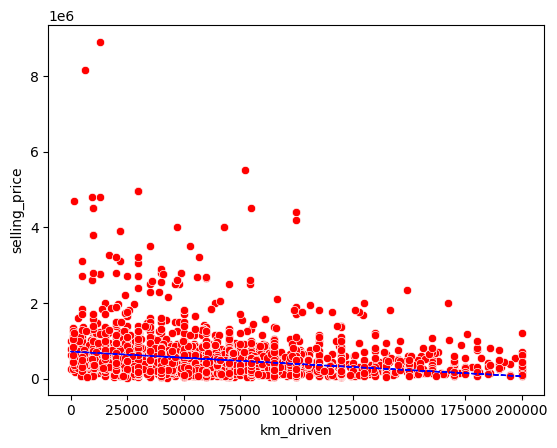

In [178]:
sns.scatterplot(x = df['km_driven'], y = df['selling_price'], c ='red')
z = np.polyfit(df['km_driven'], df['selling_price'], 1)
y_hat = np.poly1d(z)(df['km_driven'])
plt.plot(df['km_driven'], y_hat, "b--", lw=1)
plt.show()


## **Training the model**

In [179]:
# import all libraries related to Regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [180]:
x = df.drop(labels = 'selling_price', axis =1)
y = np.log10(df['selling_price'])

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(x_test.shape)

(3426, 14)
(857, 14)


In [181]:
# Standardisation
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

#### **Linear regression**

---



In [182]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

print('coef :' , model.coef_)
print('intercept :', model.intercept_)

print(model.score(x_train_scaled, y_train))
print(model.score(x_test_scaled, y_test))

coef : [-0.02286741 -0.0191244  -0.19800974 -0.0082237   0.04735846 -0.00204969
 -0.0096365  -0.04421001  0.00185379 -0.01199275  0.02918787  0.03939779
 -0.03939779  0.10735167]
intercept : 5.544172042871224
0.7640570405256464
0.7403530340599227


**Evaluation metrics**

In [183]:
y_pred = model.predict(x_test_scaled)

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_pred))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 149077962152.3854
MAE : 166085.06338591906
RMSE : 386106.1539944493


**Linear regression with cross-validation**

In [184]:
model = LinearRegression()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, x_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative mean squared error to positive (for clarity)
mse_scores = -cv_scores

# Calculate the Mean Squared Error and its mean
mean_mse = np.mean(mse_scores)
print("Mean Squared Error:", mean_mse)

# Calculate the R-squared score and its mean
r2_scores = cross_val_score(model, x_train_scaled, y_train, cv=5, scoring='r2')
mean_r2 = np.mean(r2_scores)
print("R-squared:", mean_r2)

# Coefficients and Intercept
model.fit(x_train_scaled, y_train)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

print(model.score(x_train_scaled, y_train))
print(model.score(x_test_scaled, y_test))

Mean Squared Error: 1.7265850597519557e+20
R-squared: -1.2808361114723505e+21
Coefficients: [-0.02286741 -0.0191244  -0.19800974 -0.0082237   0.04735846 -0.00204969
 -0.0096365  -0.04421001  0.00185379 -0.01199275  0.02918787  0.03939779
 -0.03939779  0.10735167]
Intercept: 5.544172042871224
0.7640570405256464
0.7403530340599227


#### **Polynomial regression with cross validation** (Best results)

---



In [185]:
# Specify the degree of the polynomial features
degree = 2  # You can set this to any desired degree

# Create the polynomial features transformer
poly_features = PolynomialFeatures(degree=degree)

# Transform the original features to polynomial features
X_poly = poly_features.fit_transform(x_train_scaled)
X_poly_test = poly_features.transform(x_test_scaled)
model = LinearRegression()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_poly, y_train, cv=8, scoring='neg_mean_squared_error')

# Convert negative mean squared error to positive (for clarity)
mse_scores = -cv_scores


# Fit the model to the polynomial features
model.fit(X_poly, y_train)
print(model.score(X_poly, y_train))
print(model.score(X_poly_test, y_test))

0.7919985056792479
0.7633296718852779


**Evaluation metrics**

In [186]:
y_pred = model.predict(X_poly_test)

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_pred))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 104228347828.07898
MAE : 150420.11856155607
RMSE : 322844.15408688906
